In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\calendar.csv')
df1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df1['price'] = df1['price'].str.replace('$', '', regex=True).replace(',', '', regex=True).astype(float)
df1.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [7]:
df2 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\listings.csv')
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
df3 = pd.read_csv('C:\\Users\\liang\Documents\\Udacity Data Scientist\\Introduction to Data Science\\Project\\reviews.csv')
df3.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [11]:
# Extract year, month, day of the week from date column
df1['Year'] = pd.DatetimeIndex(df1['date']).year
df1['Month'] = pd.DatetimeIndex(df1['date']).month
df1['Week'] = pd.DatetimeIndex(df1['date']).week
df1['date'] = pd.to_datetime(df1['date'])
#The day of the week with Monday=0, Sunday=6.
df1['Day of Week'] = df1['date'].apply(lambda time: time.dayofweek)
df1

C:\Users\liang\AppData\Local\Temp\ipykernel_76664\2276364506.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df1['Week'] = pd.DatetimeIndex(df1['date']).week


,listing_id,date,available,price,Year,Month,Week,Day of Week
0,241032,2016-01-04,t,85.0,2016,1,1,0
1,241032,2016-01-05,t,85.0,2016,1,1,1
2,241032,2016-01-06,f,NaN,2016,1,1,2
3,241032,2016-01-07,f,NaN,2016,1,1,3
4,241032,2016-01-08,f,NaN,2016,1,1,4
...,...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,2016,12,52,3
1393566,10208623,2016-12-30,f,NaN,2016,12,52,4
1393567,10208623,2016-12-31,f,NaN,2016,12,52,5
1393568,10208623,2017-01-01,f,NaN,2017,1,52,6


In [12]:
#statistics of booked days per year for each listing
df1['Booking Status'] = np.where(df1['available']=='t', 'Open', 'Full') 
df1_popularity = df1.groupby('listing_id')['Booking Status'].value_counts().unstack().reset_index()
df1_popularity = df1_popularity.fillna(0)
df1_popularity = df1_popularity.sort_values('Full')
df1_popularity

Booking Status,listing_id,Full,Open
1041,3528627,0.0,365.0
2624,7651148,0.0,365.0
2619,7646637,0.0,365.0
464,1246809,0.0,365.0
2612,7634011,0.0,365.0
...,...,...,...
307,777159,365.0,0.0
1736,5489676,365.0,0.0
1131,3773700,365.0,0.0
1418,4507137,365.0,0.0


In [13]:
#explore most popular listings
df1_most_popular_listings = df1_popularity[df1_popularity['Full']>360]
df1_most_popular_listings

Booking Status,listing_id,Full,Open
3697,9888395,361.0,4.0
3620,9636238,361.0,4.0
3673,9822759,361.0,4.0
3794,10250735,361.0,4.0
2647,7680670,361.0,4.0
...,...,...,...
307,777159,365.0,0.0
1736,5489676,365.0,0.0
1131,3773700,365.0,0.0
1418,4507137,365.0,0.0


In [14]:
#explore the least popular listings
df1_least_popular_listings = df1_popularity[df1_popularity['Full'] < 5]
df1_least_popular_listings

Booking Status,listing_id,Full,Open
1041,3528627,0.0,365.0
2624,7651148,0.0,365.0
2619,7646637,0.0,365.0
464,1246809,0.0,365.0
2612,7634011,0.0,365.0
...,...,...,...
80,140331,4.0,361.0
356,931785,4.0,361.0
2965,8174626,4.0,361.0
1125,3768745,4.0,361.0


In [15]:
most_popular_listings = list(df1_most_popular_listings['listing_id'])
least_popular_listings = list(df1_least_popular_listings['listing_id'])

In [16]:
len(most_popular_listings)


147

In [17]:
len(least_popular_listings)

917

In [18]:
#statistics of busy season for overall listing
df1_availability_statistics = df1.groupby(['Year', 'Month'])['Booking Status'].value_counts().unstack().reset_index()
df1_availability_statistics

Booking Status,Year,Month,Full,Open
0,2016,1,47665,59239
1,2016,2,37401,73321
2,2016,3,34420,83938
3,2016,4,38503,76037
4,2016,5,38387,79971
5,2016,6,37296,77244
6,2016,7,44136,74222
7,2016,8,42011,76347
8,2016,9,37294,77246
9,2016,10,35920,82438


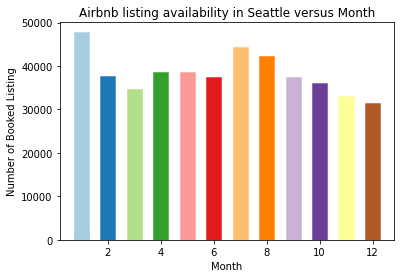

In [19]:
col_map = plt.get_cmap('Paired')
month = df1_availability_statistics['Month']
listing = df1_availability_statistics['Full']

# Creating a bar chart with bars of different color using colormap
plt.bar(month, listing, width=0.5, color=col_map.colors, edgecolor=col_map.colors, linewidth=2.5)

plt.title('Airbnb listing availability in Seattle versus Month')
plt.xlabel('Month')
plt.ylabel('Number of Booked Listing')
plt.savefig('Airbnb listing availability in Seattle versus Month.pdf')
plt.show()


In [20]:
#remove null price rows
df1_price = df1.dropna(subset=['price'], axis=0)
df1_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      934542 non-null  int64         
 1   date            934542 non-null  datetime64[ns]
 2   available       934542 non-null  object        
 3   price           934542 non-null  float64       
 4   Year            934542 non-null  int64         
 5   Month           934542 non-null  int64         
 6   Week            934542 non-null  int64         
 7   Day of Week     934542 non-null  int64         
 8   Booking Status  934542 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 71.3+ MB


In [21]:
#statstics of price per month based on all no null price rows
df1_price_month = df1_price.groupby('Month')['price'].mean().reset_index()

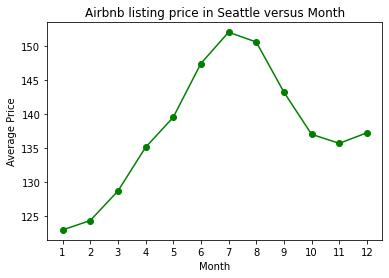

In [45]:
#generating the overall trend for price versus month
fig,ax = plt.subplots()
x=df1_price_month['Month']
y=df1_price_month['price']
xticks=df1_price_month['Month']
ax.plot(x,y,marker='o', color='g')
plt.xticks(xticks)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Airbnb listing price in Seattle versus Month')
plt.savefig('Airbnb listing price in Seattle versus Month.pdf')
plt.show()

In [23]:
#statstics of price per each day of week based on all no null price rows
df1_price_dayofweek= df1_price.groupby('Day of Week')['price'].mean().reset_index()

C:\Users\liang\AppData\Local\Temp\ipykernel_76664\2710789245.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_label)


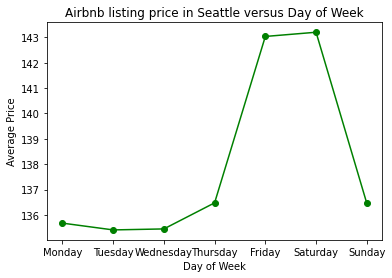

In [44]:
#generating the overall trend for price versus day of week(The day of the week with Monday=0, Sunday=6.)
fig,ax = plt.subplots()
x=df1_price_dayofweek['Day of Week']
y=df1_price_dayofweek['price']
xticks=df1_price_dayofweek['Day of Week']
xticks_label=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(x,y,marker='o', color='g')
ax.set_xticklabels(xticks_label)
plt.xticks(xticks)
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.title('Airbnb listing price in Seattle versus Day of Week')
plt.savefig('Airbnb listing price in Seattle versus Day of Week.pdf')
plt.show()

In [24]:
df2['Start Year'] = pd.DatetimeIndex(df2['host_since']).year
#explore the new Airbnb listing per year
df2_newlisting_per_year = df2.groupby('Start Year')['id'].count().reset_index()
df2_newlisting_per_year = df2_newlisting_per_year.rename(columns={'id':'Number of New Listing'})
df2_newlisting_per_year


,Start Year,Number of New Listing
0,2008.0,4
1,2009.0,64
2,2010.0,149
3,2011.0,398
4,2012.0,539
5,2013.0,776
6,2014.0,900
7,2015.0,981
8,2016.0,5


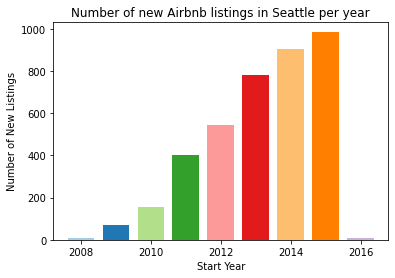

In [25]:
col_map = plt.get_cmap('Paired')
start_year = df2_newlisting_per_year['Start Year']
listing = df2_newlisting_per_year['Number of New Listing']

# Creating a bar chart with bars of different color using colormap
plt.bar(start_year, listing, width=0.7, color=col_map.colors, edgecolor=col_map.colors, linewidth=2)

plt.title('Number of new Airbnb listings in Seattle per year')
plt.xlabel('Start Year')
plt.ylabel('Number of New Listings')
plt.savefig('Number of new Airbnb listings in Seattle per year.pdf')
plt.show()


In [26]:
#explore the number of Airbnb listing per neighbourhood
df2_listings_per_neighbourhood = df2.groupby('neighbourhood_group_cleansed')['id'].count().reset_index()
df2_listings_per_neighbourhood  = df2_listings_per_neighbourhood .rename(columns={'id':'Number of Listing'})
df2_listings_per_neighbourhood 

,neighbourhood_group_cleansed,Number of Listing
0,Ballard,230
1,Beacon Hill,118
2,Capitol Hill,567
3,Cascade,89
4,Central Area,369
5,Delridge,79
6,Downtown,530
7,Interbay,11
8,Lake City,67
9,Magnolia,61


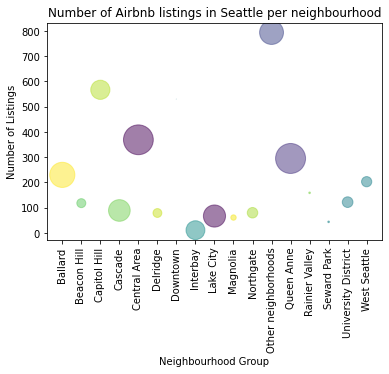

In [27]:
N = df2_listings_per_neighbourhood.shape[0]
x = df2_listings_per_neighbourhood['neighbourhood_group_cleansed']
y = df2_listings_per_neighbourhood['Number of Listing']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xticks(rotation = 90)
plt.title('Number of Airbnb listings in Seattle per neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.savefig('Number of Airbnb listings in Seattle per neighbourhood.pdf', bbox_inches='tight')
plt.show()

In [28]:
#explore the popular neighbourhood
df_popular_neighbourhood = df1.groupby(['listing_id'])['Booking Status'].value_counts().unstack().reset_index()
df_popular_neighbourhood = df_popular_neighbourhood.merge(df2, left_on='listing_id', right_on='id', how='left')
df_popular_neighbourhood = df_popular_neighbourhood.groupby('neighbourhood_group_cleansed')['Full','Open'].sum().reset_index()
df_popular_neighbourhood = df_popular_neighbourhood.merge(df2_listings_per_neighbourhood , how='left')
df_popular_neighbourhood['Average Booked Days per Listing'] = round(df_popular_neighbourhood['Full'] / df_popular_neighbourhood['Number of Listing'],0)
df_popular_neighbourhood['Average Available Days per Listing'] = round(df_popular_neighbourhood['Open'] / df_popular_neighbourhood['Number of Listing'],0)
df_popular_neighbourhood = df_popular_neighbourhood.rename(columns={'neighbourhood_group_cleansed':'Neighbourhood Group'})
df_popular_neighbourhood

C:\Users\liang\AppData\Local\Temp\ipykernel_76664\3051903866.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_popular_neighbourhood = df_popular_neighbourhood.groupby('neighbourhood_group_cleansed')['Full','Open'].sum().reset_index()


,Neighbourhood Group,Full,Open,Number of Listing,Average Booked Days per Listing,Average Available Days per Listing
0,Ballard,25835.0,58115.0,230,112.0,253.0
1,Beacon Hill,12800.0,30270.0,118,108.0,257.0
2,Capitol Hill,74287.0,132668.0,567,131.0,234.0
3,Cascade,13768.0,18717.0,89,155.0,210.0
4,Central Area,44129.0,90556.0,369,120.0,245.0
5,Delridge,7290.0,21545.0,79,92.0,273.0
6,Downtown,67725.0,125725.0,530,128.0,237.0
7,Interbay,621.0,3394.0,11,56.0,309.0
8,Lake City,5654.0,18801.0,67,84.0,281.0
9,Magnolia,5017.0,17248.0,61,82.0,283.0


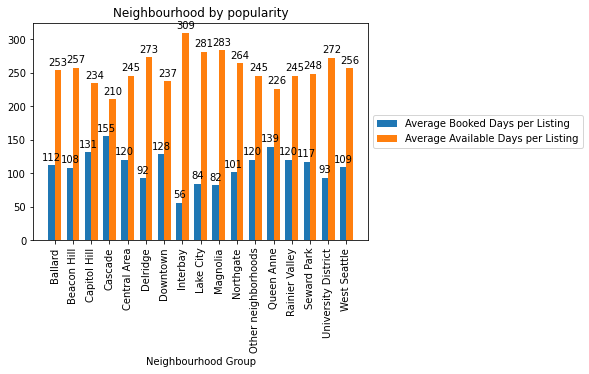

In [29]:
labels = df_popular_neighbourhood['Neighbourhood Group']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
Booked_days = df_popular_neighbourhood['Average Booked Days per Listing'] 
Available_days = df_popular_neighbourhood['Average Available Days per Listing']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Booked_days, width, label='Average Booked Days per Listing')
rects2 = ax.bar(x + width/2, Available_days, width, label='Average Available Days per Listing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Neighbourhood Group')
ax.set_title('Neighbourhood by popularity')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.savefig('Neighbourhood by popularity.pdf', bbox_inches='tight')
plt.show()

In [30]:
#explore the listing price per neighbourhood
df_price = df2.copy()
df_price['price'] = df_price['price'].str.replace('$', '', regex=True).replace(',', '', regex=True).astype(float)
df_price_neighbourhood = df_price.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

In [31]:
df_price_neighbourhood = df_price_neighbourhood.rename(columns={'neighbourhood_group_cleansed':'Neighbourhood Group'})
df_price_neighbourhood


,Neighbourhood Group,price
0,Ballard,124.682609
1,Beacon Hill,94.669492
2,Capitol Hill,130.592593
3,Cascade,140.101124
4,Central Area,128.338753
5,Delridge,83.278481
6,Downtown,154.405660
7,Interbay,109.727273
8,Lake City,92.671642
9,Magnolia,177.672131


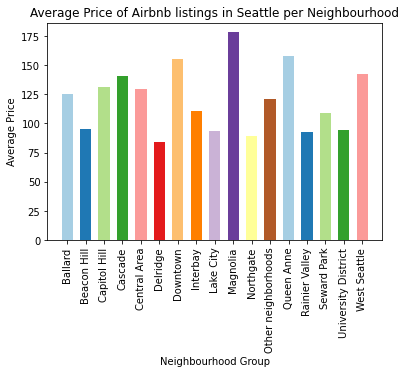

In [32]:
col_map = plt.get_cmap('Paired')
neighbourhood = df_price_neighbourhood['Neighbourhood Group']
price = df_price_neighbourhood['price']

# Creating a bar chart with bars of different color using colormap
plt.bar(neighbourhood, price, width=0.5, color=col_map.colors, edgecolor=col_map.colors, 
        linewidth=2)

plt.title('Average Price of Airbnb listings in Seattle per Neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.savefig('Average Price of Airbnb listings in Seattle per Neighbourhood.pdf', bbox_inches='tight')
plt.show()